# 1.1.3

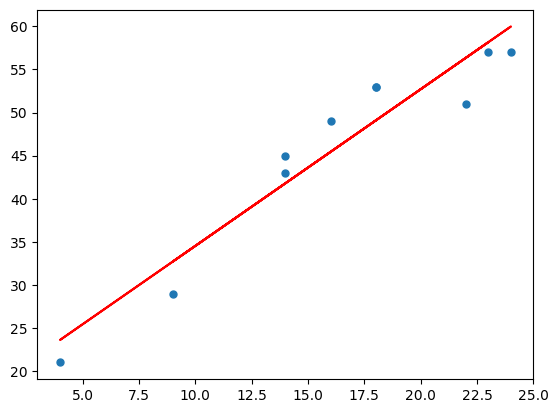

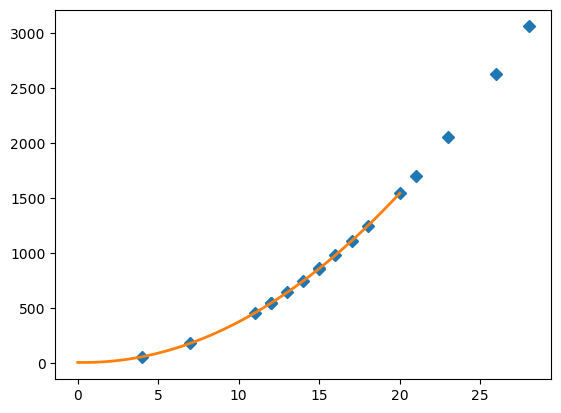

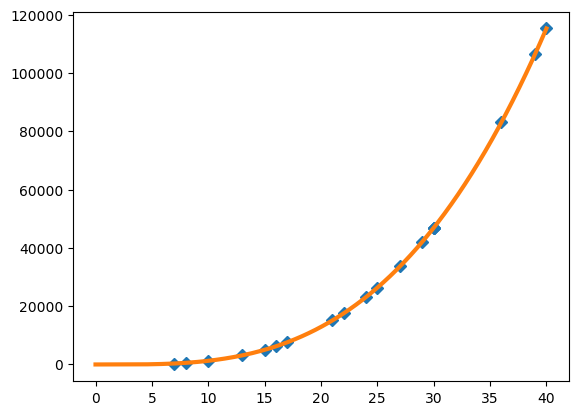

In [12]:
import numpy as np
import random
import matplotlib.pyplot as plt

def gen_p3(ndots, e, a, b, c, d):
    x = np.array([i + e*random.randint(0, 7) for i in range(ndots)])
    y = np.array([a*x**3 +b*x**2 + c*x + d + e*random.randint(0, 7) for x in x])
    return x, y

x = np.array([i + 3*random.randint(0, 7) for i in range(10)])
y = np.array([2*x+3 + 2*random.randint(0, 7) for x in x])

m1 = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(m1, y, rcond=None)[0]
plt.plot(x,y, 'o', label='initial data', markersize=5)
plt.plot(x, m*x + c, 'r', label='linear')
plt.show()

x = np.array([i + 2*random.randint(0, 7) for i in range(17)])
y = np.array([4*x**2 - 3*x + 2 + random.randint(0, 7) for x in x])
    
m = np.vstack((x**2, x,np.ones(len(x)))).T
s = np.linalg.lstsq(m,y,rcond=None)[0]

x_prec = np.linspace(0,20,149)

plt.plot(x,y,'D')

plt.plot(x_prec,s[0] * x_prec**2 + s[1]*x_prec + s[2],'-',lw=2)
plt.show()


x = np.array([i + 4*random.randint(0, 7) for i in range(19)])
y = np.array([2*x**3 -8*x**2 + 4*x + 2 + 2*random.randint(0, 7) for x in x])
    
m = np.vstack((x**3,x**2, x,np.ones(len(x)))).T
s = np.linalg.lstsq(m,y,rcond=None)[0]

x_prec = np.linspace(0,max(x),200)

plt.plot(x,y,'D')

plt.plot(x_prec,s[0] * x_prec**3 + s[1]*x_prec**2 + s[2]*x_prec + s[3],'-',lw=3)
plt.show()

# 1.1.5

[-2.09048825  2.15943889]
0.03316622166172843
14.95228515799291


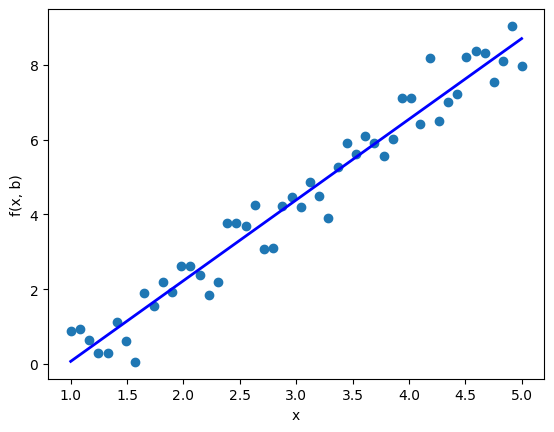

[-2.11987329  2.19039706  1.25972206]
0.02568314803894487
3.307939290937465


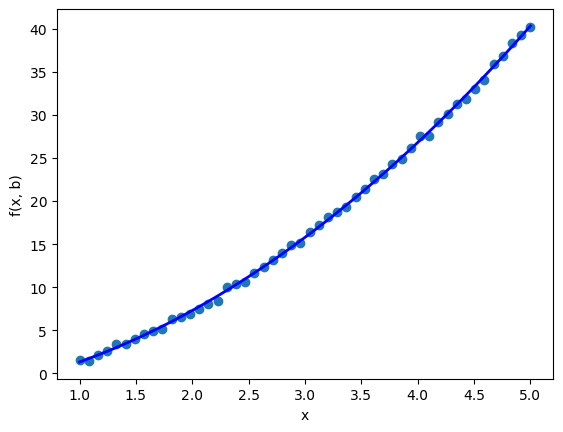

[-1.94268263  1.89611461]
0.021102874357676632
48.79915963538593


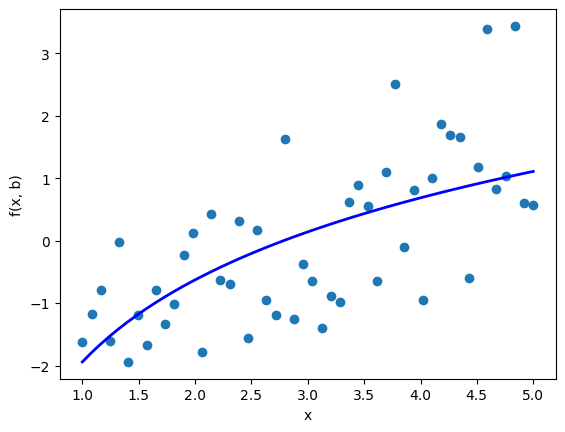

[-1.96002556  2.11574861]
0.0020735325175900675
14.200674048323998


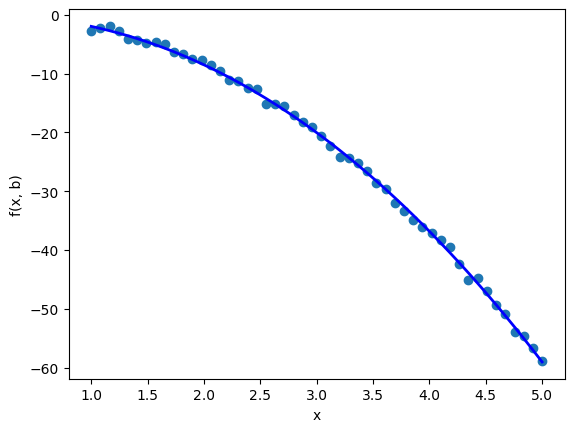

In [15]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

b_d = (-2, 2.1)

def f1(x, b0, b1):
    return b0 + b1*x

def f2(x, b0, b1, b2):
    return b0 + b1*x + b2*x**2

def f3(x, b0, b1):     
    return b0 + b1*np.log(x)
    
def f4(x, b0, b1):
    return b0 * np.power(x,b1)

x_val = np.linspace(1, 5, 50)
y = f1(x_val, *b_d)
y_val = y + 0.48*np.random.randn(len(x_val))
beta_opt, beta_corv = sc.optimize.curve_fit(f1, x_val, y_val)
print(beta_opt)

lin_err = sum(beta_corv[0])
print(lin_err)
sq_err = sum((y_val - f1(x_val, *beta_opt))**2)
print(sq_err)

fig, ax = plt.subplots()
ax.scatter(x_val, y_val)
ax.plot(x_val, f1(x_val, *beta_opt), 'b', lw=2)
ax.set_xlabel("x")
ax.set_ylabel("f(x, b)")
plt.show()


y = f2(x_val, *(*b_d, 1.27))
y_val = y + 0.28*np.random.randn(len(x_val))
beta_opt, beta_corv = sc.optimize.curve_fit(f2, x_val, y_val)
print(beta_opt)

lin_dev = sum(beta_corv[0])
print(lin_dev)
residuals = y_val - f2(x_val, *beta_opt)
fres = sum(residuals ** 2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(x_val, y_val)
ax.plot(x_val, f2(x_val, *beta_opt), 'b', lw=2)
ax.set_xlabel("x")
ax.set_ylabel("f(x, b)")
plt.show()

y = f3(x_val, *b_d)
y_val = y + 0.98*np.random.randn(len(x_val))
beta_opt, beta_corv = sc.optimize.curve_fit(f3, x_val, y_val)
print(beta_opt)

lin_dev = sum(beta_corv[0])
print(lin_dev)
residuals = y_val - f3(x_val, *beta_opt)
fres = sum(residuals ** 2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(x_val, y_val)
ax.plot(x_val, f3(x_val, *beta_opt), 'b', lw=2)
ax.set_xlabel("x")
ax.set_ylabel("f(x, b)")
plt.show()


y = f4(x_val, *b_d)
y_val = y + 0.7*np.random.randn(len(x_val))
beta_opt, beta_corv = sc.optimize.curve_fit(f4, x_val, y_val)
print(beta_opt)

lin_dev = sum(beta_corv[0])
print(lin_dev)
residuals = y_val - f4(x_val, *beta_opt)
fres = sum(residuals ** 2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(x_val, y_val)
ax.plot(x_val, f4(x_val, *beta_opt), 'b', lw=2)
ax.set_xlabel("x")
ax.set_ylabel("f(x, b)")
plt.show()

# 1.2.1

26780.09915062818

[9312.57512673]


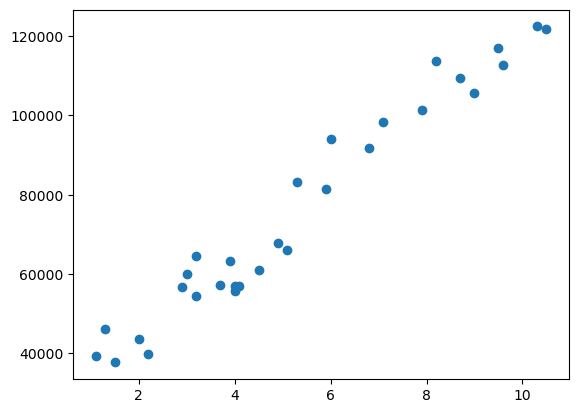

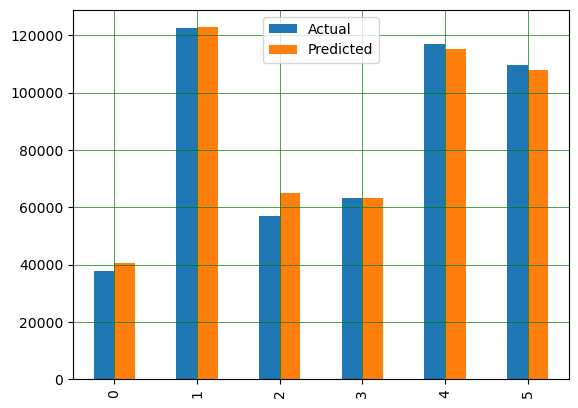

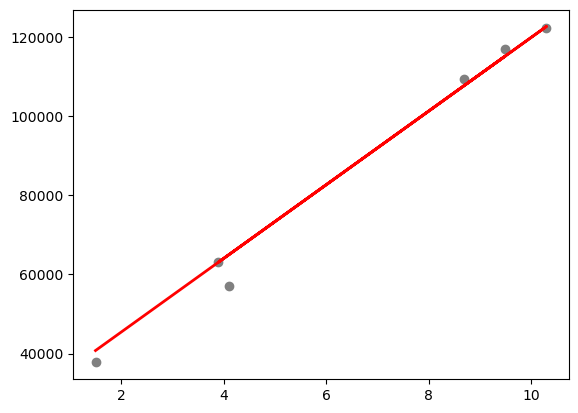

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

data = pd.read_csv('https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv')
plt.scatter(data['YearsExperience'],data["Salary"])
x = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
reg = LinearRegression()
reg.fit(x_train,y_train)
print(reg.intercept_)
print(reg.coef_)

y_pred = reg.predict(x_test)
df = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
df
df.plot(kind='bar')
plt.grid(which='major',linestyle='-',linewidth='0.5',color='green')
plt.grid(which='minor',linestyle=':',linewidth='0.5',color='black')
plt.show()
plt.scatter(x_test,y_test,color='gray')
plt.plot(x_test,y_pred,color='red',linewidth=2)
plt.show()

In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

y = [1,2,3,4,3,4,5,3,5,5,4,5,4,5,4,5,6,0,6,3,1,3,1]
x = [[0,2,4,1,5,4,5,9,9,9,3,7,8,8,6,6,5,5,5,6,6,5,5],
     [4,1,2,3,4,5,6,7,5,8,7,8,7,8,7,8,6,8,9,2,1,5,6],
     [4,1,2,5,6,7,8,9,7,8,7,8,7,4,3,1,2,3,4,1,3,9,7]]

new_y = np.array(y)
new_y = new_y.transpose()
df1 = pd.DataFrame(new_y)
new_x = np.array(x)
new_x = new_x.transpose()
df2 = pd.DataFrame(new_x)
df1 = df1.rename(columns = {0:'y'},inplace = False)
df2 = df2.rename(columns = {0:'x1',1:'x2',2:'x3'},inplace=False)

frames = [df1,df2]
dataset = pd.concat([df1,df2],axis=1,join='inner')
dataset.head()

print(dataset.shape)
dataset.describe()

x = dataset[['x1','x2','x3']]
y = dataset['y']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(x_train,y_train)

coeff_df = pd.DataFrame(regressor.coef_,x.columns,columns=['Coefficient'])
coeff_df

y_pred = regressor.predict(x_test)
df = pd.DataFrame({"Actual":y_test,'Predicted':y_pred})
df

print('Mth Squared Error:',metrics.mean_squared_error(y_test,y_pred))

(23, 4)

Mth Squared Error: 1.327269924234307


# 1.3.1

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

data = pd.read_csv("https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv")
data
data.describe()
x_train, x_test, y_train, y_test = train_test_split(data.iloc[:, :-1].values, data.iloc[:, 1], test_size=0.2,random_state=0)
regress = LinearRegression()
regress.fit(x_train,y_train)
coeff_df = pd.DataFrame(regress.coef_,data.iloc[:,:-1].columns,columns=['Coefficient'])
coeff_df

y_pred = regress.predict(x_test)
df = pd.DataFrame({"train":y_test,'test':y_pred})
df
df.plot(kind='bar')
plt.show()

<class 'urllib.error.URLError'>: <urlopen error unknown url type: https>

# 1.3.2

[3.  3.2 3.4 3.6 3.8 4. ] [6. 2. 6. 4. 3. 4.]
-1.2857142857142867 8.66666666666667


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


2.2321428571427098 -16.91071428571345 35.74999999999893


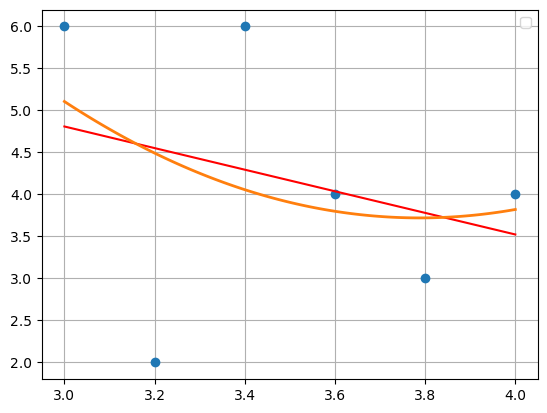

In [ ]:
import numpy as np
from numpy import vstack,ones,linspace
import matplotlib.pyplot as plt

x = [3.0,3.2,3.4,3.6,3.8,4.0]
y = [6.0,2.0,6.0,4.0,3.0,4.0]

new_y = np.array(y)
new_x = np.array(x)
print(new_x,new_y)
A = np.vstack([new_x,np.ones(len(new_x))]).T
A
m,c = np.linalg.lstsq(A,new_y,rcond=None)[0]
print(m,c)

plt.plot(new_x,new_y,'o')
plt.plot(new_x,m*new_x+c,'r')
plt.legend()

m = vstack([new_x**2,new_x,ones(len(new_x))]).T
s = np.linalg.lstsq(m,new_y,rcond=None)[0]
x_prec = linspace(3,4,100)

plt.plot(x_prec,s[0]*x_prec**2+s[1]*x_prec+s[2],'-',lw=2)
plt.grid()
print(s[0],s[1],s[2])